<a href="https://colab.research.google.com/github/shubhamByte/Machine-Learning/blob/main/Pytorch_CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np

# Preparing the Dataset

In [13]:
# Transformer
# transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
transform = transforms.Compose([transforms.ToTensor()])

# Downloading Data
train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='./data', train=False, download=True, transform=transform)


trainloader = torch.utils.data.DataLoader(train_data, batch_size= 128, shuffle=True)
testloader = torch.utils.data.DataLoader(test_data, batch_size= 128, shuffle=False)

In [14]:
classes = train_data.classes
print(classes)


['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']


In [15]:
print(train_data[2][0].shape)

torch.Size([1, 28, 28])


### Visualise the sample data

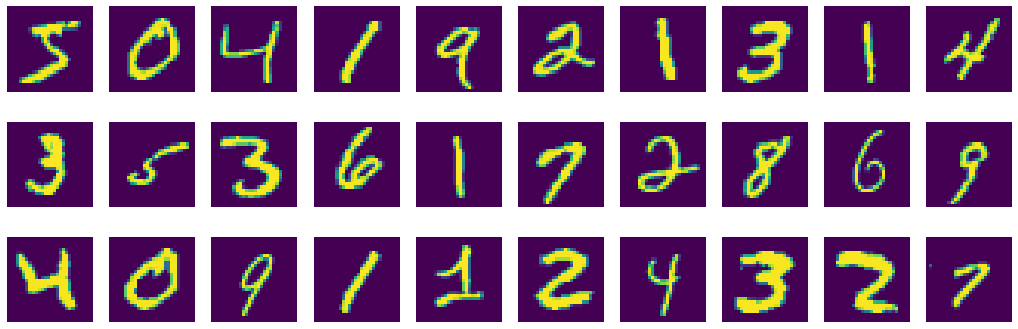

In [16]:
figure = plt.figure(figsize=(18, 6))
cols, rows = 10, 3

# labelMap = { 0 :'airplane',  1 :'automobile',  2 : 'bird' ,  3 : 'cat',  4 : 'deer', 5 : 'dog',  6 : 'frog',  7 : 'horse', 8 : 'ship',  9 : 'truck'}

for i in range(cols * rows):
  img, label = train_data[i]
  figure.add_subplot(rows, cols, i + 1)     # starts from 1 that's why added 1

  plt.imshow(img.numpy().transpose(1,2,0))
 
  
  plt.axis("off")

plt.show()


# Defining Model

### Hyperparameters

In [17]:
input_width = 28
input_height = 28
input_channels = 1
input_pixels = input_width * input_height * input_channels

n_conv1 = 32
n_conv2 = 64
n_conv3 = 64

kernelConv = 4
stride_conv = 1

kernelPool = 3

n_hidden = 512
n_classes = 10

learning_rate = 0.0001
num_epochs = 3

input_size_to_hidden = 2304       # 7 * 7 * 64

In [18]:
# CNN architecture
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        # first convolution layer
        self.conv1 = nn.Conv2d(in_channels=input_channels, out_channels=n_conv1, kernel_size=kernelConv)
        nn.init.kaiming_uniform_(self.conv1.weight, nonlinearity='relu')        # he intialisation
        self.act1 = nn.ReLU()                                                   # activation

        # second convolution layer
        self.conv2 = nn.Conv2d(in_channels=n_conv1, out_channels=n_conv2, kernel_size=kernelConv)
        nn.init.kaiming_uniform_(self.conv2.weight, nonlinearity='relu')        # he intialisation
        self.act2 = nn.ReLU()                                                   # activation

        # third convolution layer
        self.conv3 = nn.Conv2d(in_channels=n_conv2, out_channels=n_conv3, kernel_size=kernelConv)
        nn.init.kaiming_uniform_(self.conv3.weight, nonlinearity='relu')        # he intialisation
        self.act3 = nn.ReLU()                                                   # activation
        # pooling
        self.pool1 = nn.MaxPool2d(kernel_size = kernelPool, stride = kernelPool)
        

        # fully connected layer
        self.FC1 = nn.Linear(input_size_to_hidden, n_hidden)
        nn.init.kaiming_uniform_(self.FC1.weight, nonlinearity='relu')
        self.act4 = nn.ReLU()

        # output layer
        self.FC2 = nn.Linear(n_hidden, n_classes)
        nn.init.xavier_uniform_(self.FC2.weight)
        self.act5 = nn.LogSoftmax(dim=1)


        

    # forward overloading
    def forward(self, X):
        # input to first hidden layer
        X = self.conv1(X)
        X = self.act1(X)

        # second hidden layer
        X = self.conv2(X)
        X = self.act2(X)
 
        # third hidden layer
        X = self.conv3(X)
        X = self.act3(X)
        X = self.pool1(X)

        # flatten
        X = X.reshape(-1, 2304)
        
        # third hidden layer
        X = self.FC1(X)
        X = self.act4(X)
        # output layer
        X = self.FC2(X)
        X = self.act5(X)
        return X


# Training the model

In [19]:
model = CNN()
optimizer = optim.Adam(model.parameters(), lr = learning_rate) 
criterion = nn.CrossEntropyLoss()

loss_list = []

for epoch in range(num_epochs):
    running_loss = 0.0
    # enumerate mini batches
    # i is batch_indx
    for i, (inputs, targets) in enumerate(trainloader):
        # clear the gradients
        optimizer.zero_grad()
        # compute the model output
        yhat = model(inputs)
        # calculate loss
        loss = criterion(yhat, targets)
        # credit assignment
        loss.backward()
        # update model weights
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 40 == 39:    # print every 40 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 40:.3f}')
            loss_list.append(running_loss / 40)
            running_loss = 0.0



print('Finished Training.')

[1,    40] loss: 1.194
[1,    80] loss: 0.333
[1,   120] loss: 0.234
[1,   160] loss: 0.182
[1,   200] loss: 0.146
[1,   240] loss: 0.132
[1,   280] loss: 0.103
[1,   320] loss: 0.118
[1,   360] loss: 0.111
[1,   400] loss: 0.089
[1,   440] loss: 0.083
[2,    40] loss: 0.067
[2,    80] loss: 0.068
[2,   120] loss: 0.063
[2,   160] loss: 0.063
[2,   200] loss: 0.057
[2,   240] loss: 0.060
[2,   280] loss: 0.060
[2,   320] loss: 0.054
[2,   360] loss: 0.051
[2,   400] loss: 0.052
[2,   440] loss: 0.058
[3,    40] loss: 0.049
[3,    80] loss: 0.033
[3,   120] loss: 0.040
[3,   160] loss: 0.038
[3,   200] loss: 0.039
[3,   240] loss: 0.038
[3,   280] loss: 0.038
[3,   320] loss: 0.040
[3,   360] loss: 0.043
[3,   400] loss: 0.047
[3,   440] loss: 0.035
Finished Training.


### Iterations and epochs vs Loss

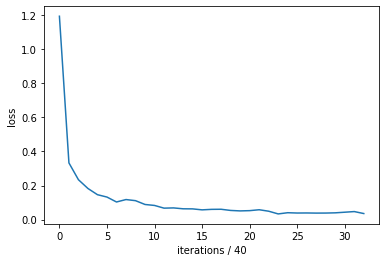

In [24]:
x_values = range(len(loss_list)) 
plt.plot(x_values,loss_list)
plt.xlabel('iterations / 40')
plt.ylabel('loss')
plt.show()

In [25]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = model(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 98 %
